In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
from scipy import signal

In [2]:
def read_data_1():
    data = pd.read_csv('data/Accelerometer2.csv')
    # data = data[data.index % 5 == 0]
    data = data[data['seconds_elapsed'] > 1]
    data = data[data['seconds_elapsed'] < 60]
    
    return data

In [3]:
def read_data_2():
    data=pd.read_csv('data/Sam_LP_Accelerometer.csv')
    data = data[data['seconds_elapsed'] > 31]
    data = data[data['seconds_elapsed'] < 91]
    return data

In [4]:
def butterworth_filter(x, y, z):
    b, a = signal.butter(3, 0.1, btype='lowpass', analog=False)

    filtered_x = signal.filtfilt(b, a, x)
    filtered_y = signal.filtfilt(b, a, y)
    filtered_z = signal.filtfilt(b, a, z)
    
    return filtered_x, filtered_y, filtered_z

### Adapted from https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html 
### Also from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html


In [5]:
# Adapted from https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html 
# Also from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

# Using low = 1 and high = 3 at sample_frequency = 50

def bandpass_filter(x, y, z, low, high, sample_frequency):
    
    nyquist_frequency = 0.5 * sample_frequency
    
    low = low / nyquist_frequency
    high = high / nyquist_frequency
    
    b , a = signal.butter(3, Wn=[low, high], btype='bandpass')

    filtered_x = signal.filtfilt(b, a, x)
    filtered_y = signal.filtfilt(b, a, y)
    filtered_z = signal.filtfilt(b, a, z)


    return filtered_x, filtered_y, filtered_z

In [6]:
def plot_axis(x, y):
    plt.plot(x, y)

### # Adapted from https://stackoverflow.com/questions/66675657/fast-fourier-transform-for-an-accelerometer-in-python


In [7]:
def fft(data, axis):
    sample_rate = data.shape[0]
    seconds = data.iloc[-1, 1]
    g = data[axis]
    # Adapted from https://stackoverflow.com/questions/66675657/fast-fourier-transform-for-an-accelerometer-in-python
    # This returns the fourier transform coeficients as complex numbers
    transformed_g = np.fft.fft(g)

    # Take the absolute value of the complex numbers for magnitude spectrum
    freqs_magnitude = np.abs(transformed_g)

    # Create frequency x-axis that will span up to sample_rate
    freq_axis = np.linspace(0, sample_rate / seconds, len(freqs_magnitude))

    # Plot frequency domain
    plt.plot(freq_axis, freqs_magnitude)
    plt.xlabel("Frequency (Hz)")
    plt.xlim(0, 2)
    plt.show()

In [26]:
def test(flag):
    if flag == 1:
        data = read_data_1()
        low = 0.5
        high = 1.5
    else:
        data = read_data_2()
        low = 0.4
        high = 1.2

#     print(data)

#     plot_axis(data['seconds_elapsed'], data['x'])
#     plot_axis(data['seconds_elapsed'], data['y'])
#     plot_axis(data['seconds_elapsed'], data['z'])

    x = data['x'].values
    y = data['y'].values
    z = data['z'].values
    time = data['seconds_elapsed'].values
    
    sample_frequency = 50
    filtered_x , filtered_y , filtered_z = bandpass_filter(x, y, z, low, high, sample_frequency)

    plot_axis(data['seconds_elapsed'], filtered_x)
    plot_axis(data['seconds_elapsed'], filtered_y)
    plot_axis(data['seconds_elapsed'], filtered_z)


    
    data['filtered_x'] = filtered_x
    data['filtered_y'] = filtered_y
    data['filtered_z'] = filtered_z
    

    fft(data, 'filtered_z')


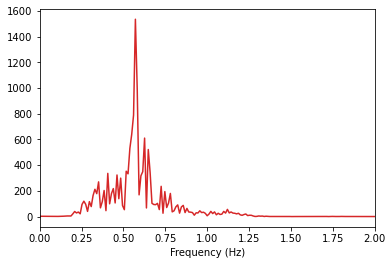

In [28]:
test(2)